In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [19]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [20]:
data_df = pd.DataFrame(data_scaled, columns=['feature_1', 'feature_2'])

In [21]:
data_df.head()

,feature_1,feature_2
0,-1.116190,0.583772
1,-1.192142,0.658633
2,0.325204,0.796111
3,-0.699477,-1.387959
4,-1.415179,0.558312


KMEAN

In [22]:
def initial_centroids(num_clusters,data):
  centroids=data.sample(num_clusters)
  return centroids

In [23]:
np.random.seed(42)
n_clusters=3
centroids=initial_centroids(n_clusters,data_df)
print(centroids)

     feature_1  feature_2
203    1.41172  -0.003629
266   -0.63547  -1.481974
152    1.57655  -0.240510


In [24]:
def error(x,y):
  return np.square(np.sum((x-y)**2))

In [25]:
def assign_centroids(data,centroids):
  labels=[]
  k=centroids.shape[0]

  for sample in range(data.shape[0]):
    error_a=np.array([])
    for centroid in range(k):
      err=error(centroids.iloc[centroid,:],data.iloc[sample,:])
      error_a=np.append(error_a,err)
    
    nc=np.where(error_a==np.amin(error_a))[0].tolist()[0]
    labels.append(nc)

  return labels
    

In [26]:
def kmeans(n_clusters,data):
  temp=data.copy()
  flag=True
  centroids=[]
  prev_centroids=[]
  init_cent=initial_centroids(n_clusters,temp)
  while(flag):
    temp['Centroid']=assign_centroids(temp,init_cent)
    centroids=temp['Centroid'].values.tolist()
    if(centroids==prev_centroids):
      flag=False
      break
  
    prev_centroids=centroids
  
  return temp['Centroid']

In [37]:
data_df['Centroid']=kmeans(n_clusters,data_df)

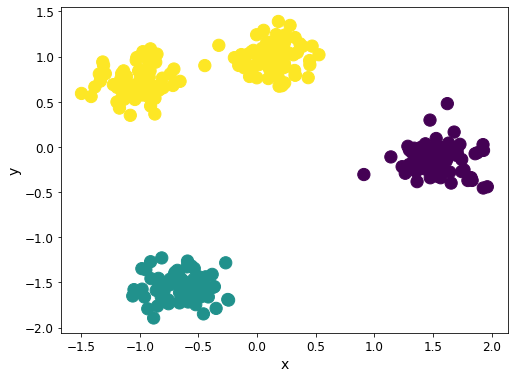

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=data_df['feature_1'], y=data_df['feature_2'], s=150,
            c=data_df['Centroid'].astype('category'))
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

KMEDOID

In [45]:
def initialize_medoids(data, k):
    n_samples = data.shape[0]
    medoid_indices = np.random.choice(n_samples, k, replace=False)
    medoids = data[medoid_indices]
    return medoids


def compute_dissimilarities(data, medoids):
    n_samples = data.shape[0]
    n_medoids = medoids.shape[0]
    dissimilarities = np.zeros((n_samples, n_medoids))
    for i in range(n_medoids):
        dissimilarities[:, i] = np.linalg.norm(data - medoids[i], axis=1)
    return dissimilarities

In [46]:
def assign_clusters(dissimilarities):
    clusters = np.argmin(dissimilarities, axis=1)
    return clusters


def update_medoids(data, clusters, k):
    medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_indices = np.where(clusters == i)[0]
        cluster_data = data[cluster_indices]
        cluster_dissimilarities = dissimilarities[cluster_indices, i]
        medoid_index = cluster_indices[np.argmin(cluster_dissimilarities)]
        medoids[i] = data[medoid_index]
    return medoids


def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for i in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


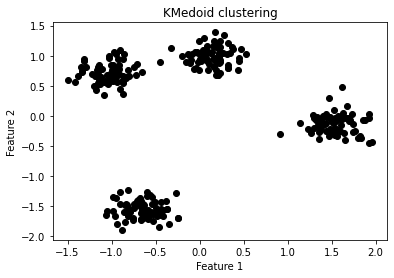

In [47]:
medoids,clusters = kmedoids(data_scaled, k=3)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='rainbow')
plt.title('KMedoid clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()